## Final Project Submission

Please fill out:
* Student name: Lennart


## 1. Business Case

#### General: What factors define the price of a house in the area of King County?

#### Buyer's Perspective: What is an appropriate price of a house given certain parameter?

#### Seller's Perspective: What could a seller of a house do in order to maximize the selling price? 

### Import Packages

In [2]:
#import of data packages:
import pandas as pd

import numpy as np

import statsmodels.api as sms

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 50)

## 2. Import of Data

In [3]:
#import of data frame:

df = pd.read_csv("King_County_House_prices_dataset.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
f = open("column_names.md", "r")
print(f.read())
f.close()

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

### Describtion of Data

In [5]:
df.sort_values(by='price', ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750


In [6]:
df.shape

(21597, 21)

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## 3. Data Cleaning

### Create 2nd Data Frame

In [10]:
# create second data frame and keep original data frame for reference

df2 = df.copy()

### Drop Columns

In [11]:
# drop clomuns not needed

df2.drop('id', inplace=True, axis=1)
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Delete Outlier

In [12]:
# Drop observation with highest SQFT Living area

df2.drop(df2['sqft_living'].idxmax(), inplace=True)

In [13]:
# Drop observation with highest number of bedrooms

df2.drop(df2['bedrooms'].idxmax(), inplace=True)

### Variable: Date

In [14]:
# convert date to pandas date time object
# new column with month sold

df2['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

df2['month'] = df2.date.dt.month

### Variable: Waterfront

In [15]:
# check for unique values in column to understand the data structure
# convert NaN values to zero

df2.waterfront = df2.waterfront.fillna(0)
df2.waterfront.unique()

array([0., 1.])

### Variable: View

In [16]:
# check for unique values in column to understand the data structure
# convert NaN values to zero

df2.view = df2.view.fillna(0)
df2.view.unique()

array([0., 3., 4., 2., 1.])

### Variable: Basement

In [17]:
# convert basement data type from object to number
# fill nan with zero
# rewrite sqft basement as difference of sqft living and sqft above

df2.sqft_basement = pd.to_numeric(df2.sqft_basement, errors='coerce')
df2.sqft_basement = df2.sqft_basement.fillna(0)
df2['sqft_basement'] = df2.sqft_living - df2.sqft_above

### Variable: Year Renovated

In [18]:
df2.yr_renovated = df2.yr_renovated.fillna(0)

## 4. Data Exploration

### Sales Price Distribution

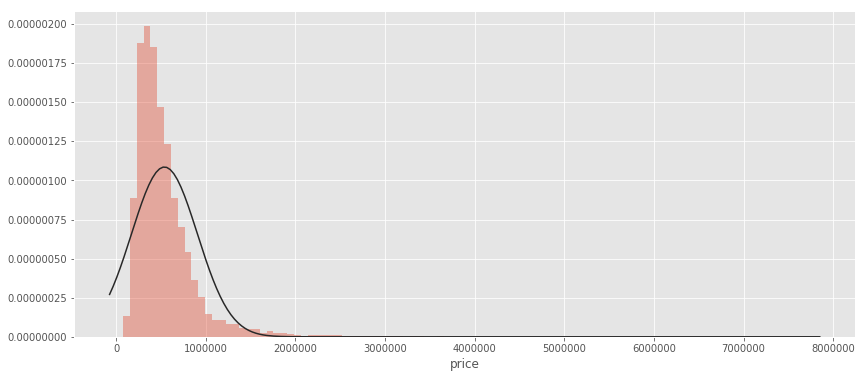

In [19]:
from scipy.stats import norm
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df2.price, bins=100, kde=False, fit=norm)

Most of the prices are below 1 Mio. USD. 
Due to outliers of prices greater than 1 Mio. USD (upto 7.8 Mio. USD) the distribution of prices has positive skewness to the right side. 

In [20]:
print("skewness of house prices: %s" %df2.price.skew())
print("kurtosis of house prices: %s" %df2.price.kurt())

skewness of house prices: 4.025243706364676
kurtosis of house prices: 34.596621207514985


### Heat Map

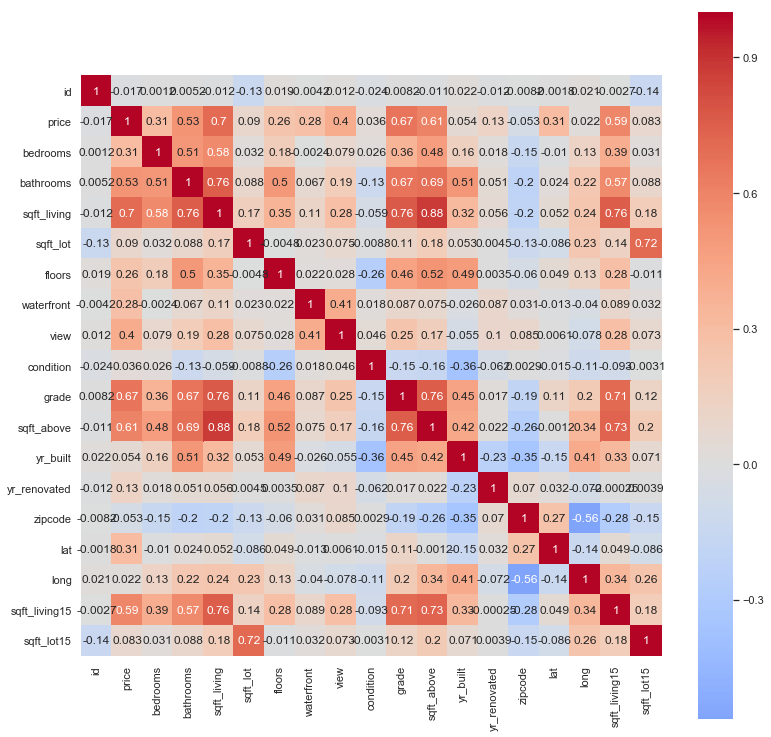

In [64]:
corr = df.corr()
f, ax = plt.subplots(figsize = (13,13))
sns.heatmap(data = corr, center = 0, cmap="coolwarm", annot=True, square=True)

### Variable: Bedrooms

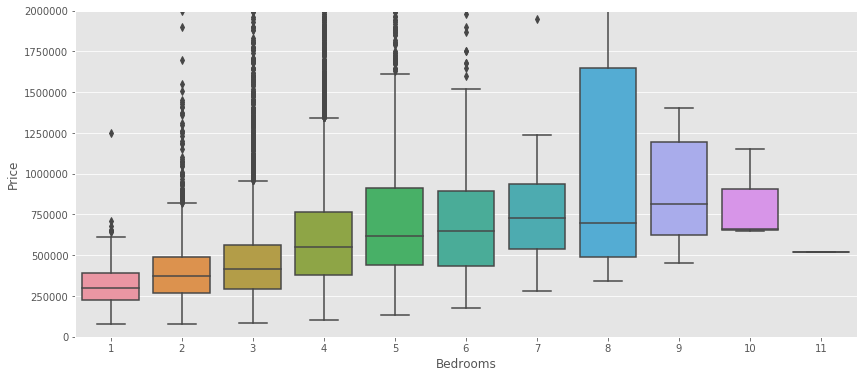

In [22]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='bedrooms', y='price', data=df2)
fig.axis(ymin=0, ymax=2000000)

plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

With the number of bedrooms the price increases. Number of bedrooms and the price seem to be positively correlated. 

### Variable: Grade

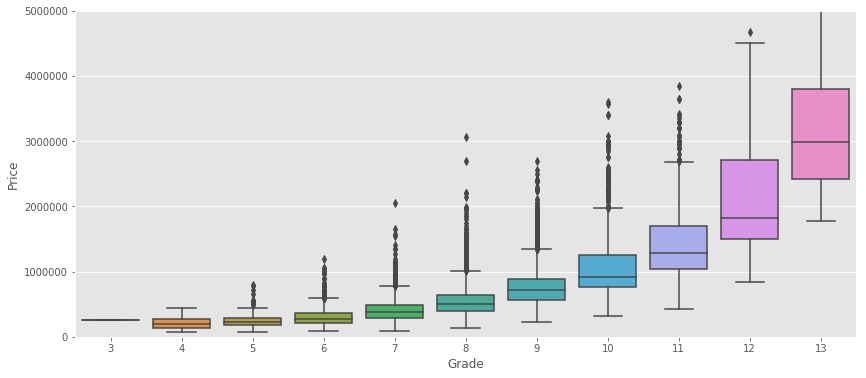

In [23]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='grade', y='price', data=df2)
fig.axis(ymin=0, ymax=5000000)

plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

With the price increases with the level of the grade. Grade and price seem to be positively correlated. 

### Variable: Zipcode

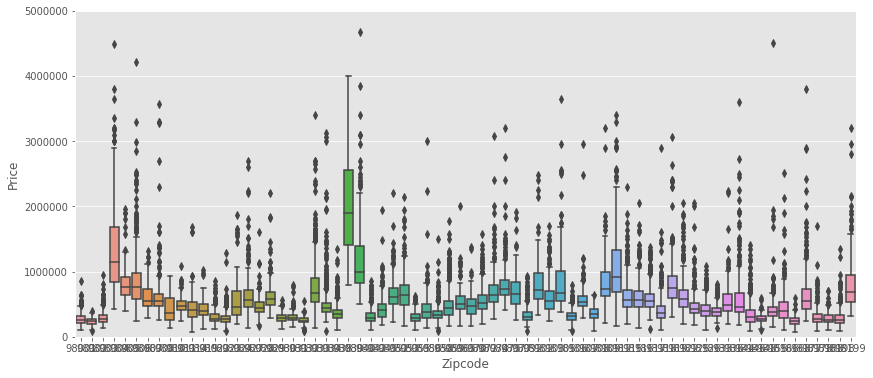

In [24]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='zipcode', y='price', data=df2)
fig.axis(ymin=0, ymax=5000000)

plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()

Out of the 70 different zipcodes there are clearly areas in King County which are higher priced than others.

In [25]:
# Top 5 Zidcodes:

grouped = df.groupby('zipcode')['price'].median().reset_index()
grouped_sorted = grouped.sort_values('price', ascending=False)
grouped_sorted.head()

,zipcode,price
24,98039,1895000.0
3,98004,1150000.0
25,98040,993750.0
48,98112,915000.0
4,98005,765475.0


In [26]:
grouped.sort_values('price', ascending=True).head()

,zipcode,price
1,98002,235000.0
64,98168,235000.0
20,98032,249000.0
0,98001,260000.0
67,98188,264000.0


In [27]:
#HOW DO I ASSIGN AN INDEX TO A CERTAIN ROW?

#zip_range_list = df.groupby('zipcode')['price'].median()
#df2['zipcode_range'] = 0
#df2.loc[df2['yr_renovated'] != 0, 'zipcode_range'] = 1

#df_zip = pd.DataFrame(grouped_sorted, columns=['zip', 'price'])
#df_zip.set_index('...', inplace=True)
#df_zip.head()

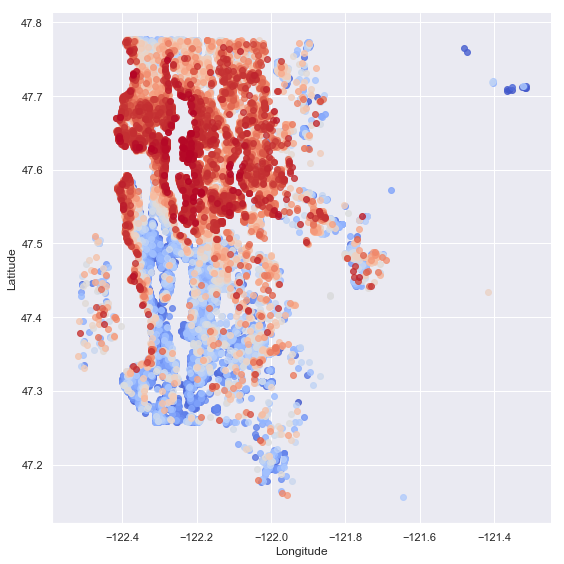

In [65]:
# plots houses sold by longitude and latitude and gives back the price of the houses by the color of 

sns.lmplot(y="lat", x="long", hue="price", data=df, fit_reg = False, height = 8, legend = False, palette = "coolwarm")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Variable: Month

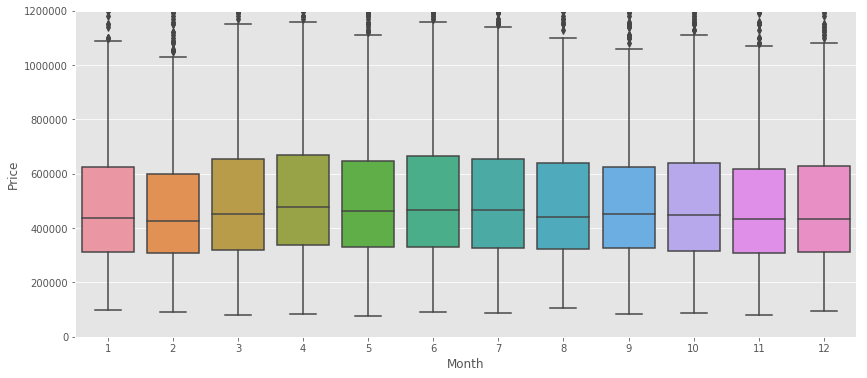

In [29]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='month', y='price', data=df2)
fig.axis(ymin=0, ymax=1200000)

plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

### Variable: SQFT Living

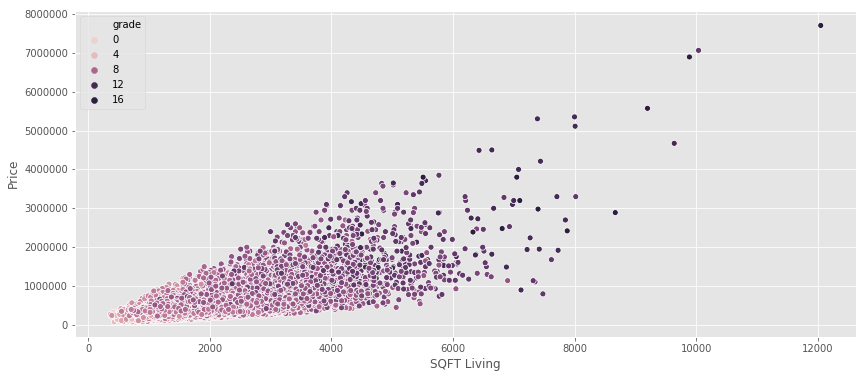

In [30]:
f, ax = plt.subplots(figsize=(14, 6))
sns.scatterplot(x="sqft_living", y="price", hue='grade', data=df2)

plt.xlabel("SQFT Living")
plt.ylabel("Price")
plt.show()

The scatter plot of SQFT Living and Price suggests a positive correlation of both variable. 

### Scatter Plots

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


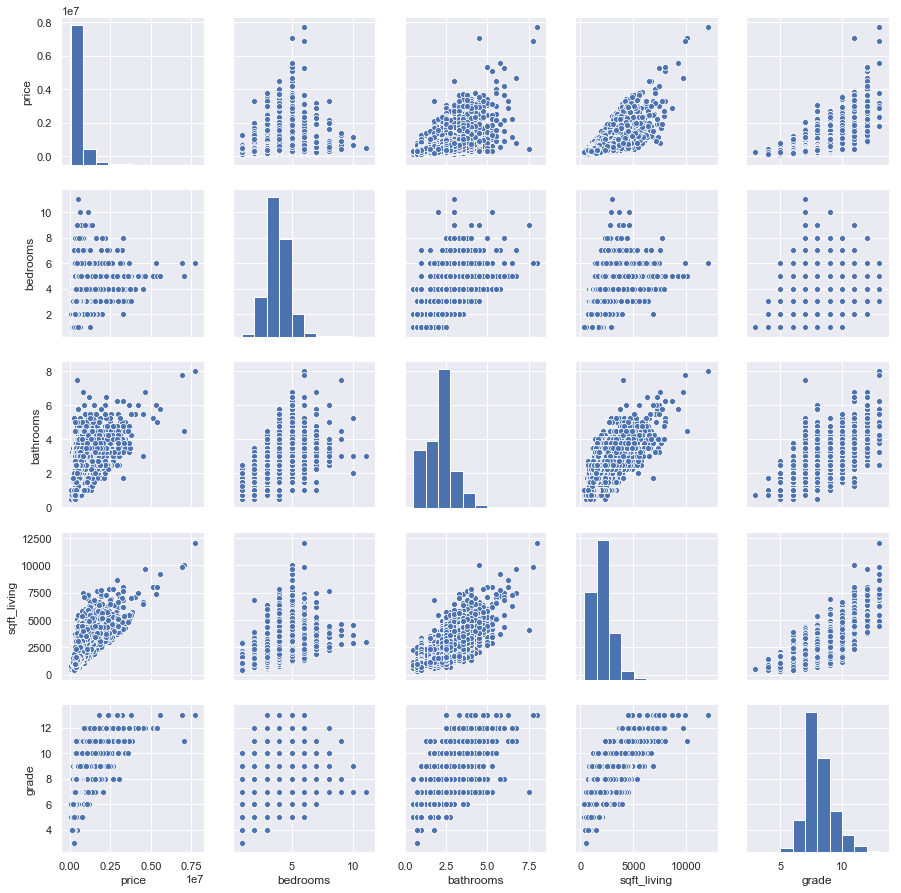

In [31]:
sns.set()
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']
sns.pairplot(df2[cols], size = 2.5)
plt.show()

## 5. Feature Engeneering

### Variable: Renovated

In [32]:
# count 0 values in yr_renovated per yr_built
#df.yr_built[df["yr_renovated"]==0].value_counts()

In [33]:
# create second data frame to keep the original 
# remove NaN values from yr_renovated and replace with 0 for not being renovated
# transform year values into 1 for being renovated 
# tranform 0 values for not being renovated into 1 for houses not older than 30 years

df3 = df2.copy()
df3['renovated'] = 0
#df3.yr_renovated[np.isnan(df3.yr_renovated)] = 0
#df3.yr_renovated = df2.yr_renovated.fillna(0)
df3.loc[df3['yr_renovated'] != 0, 'renovated'] = 1
df3.loc[df3['yr_built'] >= 1985, 'renovated'] = 1

df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1


### Variable: Seasonality

In [34]:
# Add variable season
#

season_list = []
#df3['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
for i in df3.date.dt.month:
    if i >= 3 and i <= 5:
        season_list.append(1)
    elif i >= 6 and i <= 8:
        season_list.append(2)
    elif i >=9 and i <= 11:
        season_list.append(3)
    else:
        season_list.append(0)

df3['season'] = season_list

df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0,3
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1,0


### Variable: Basement Dummy

In [35]:
# Add dummy for basement

basement_list = []
for i in df3.sqft_basement:
    if i != 0: 
        basement_list.append(1)
    else:
        basement_list.append(0)
        
df3['basement'] = basement_list

df3.head()

#df3.sqft_basement.astype(int)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,season,basement
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0,3,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1,0,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0,0,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1,0,0


### Variable: Built Dummy

In [36]:
# check min and max of variable to know the range for clustering the variable

df3.yr_built.max()
df3.yr_built.min()

built_list = []
for i in df3.yr_built:
    if i >= 1900 and i <= 1910:
        built_list.append(0)
    elif i >= 1911 and i <= 1920: 
        built_list.append(1)
    elif i >= 1921 and i <= 1930: 
        built_list.append(2)
    elif i >= 1931 and i <= 1940: 
        built_list.append(3)
    elif i >= 1941 and i <= 1950: 
        built_list.append(4)
    elif i >= 1951 and i <= 1960: 
        built_list.append(5)
    elif i >= 1961 and i <= 1970: 
        built_list.append(6)
    elif i >= 1971 and i <= 1980: 
        built_list.append(7)
    elif i >= 1981 and i <= 1990: 
        built_list.append(8)
    elif i >= 1991 and i <= 2000: 
        built_list.append(9)
    else: 
        built_list.append(10)

df3['built'] = built_list
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,season,basement,built
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0,3,0,5
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1,0,1,5
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0,0,0,3
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0,0,1,6
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1,0,0,8


### Variable: Zipcode Dummy

In [37]:
df3.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [38]:
df3['zipcode'] = df3.zipcode.astype(str)
zipcode_dummy = pd.get_dummies(df3.zipcode, prefix='zip', drop_first=True)
df3 = pd.concat([df3, zipcode_dummy], axis=1)
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,season,basement,built,...,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0,3,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1,0,1,5,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1,0,0,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
zipcode_dummy.columns

Index(['zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_98198', 'zip_98199'],
    

### Variable: Grade Dummy

In [40]:
df3.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [41]:
#df3['grade'] = df2.garde.astype(str)
grade_dummy = pd.get_dummies(df3.grade, prefix='grade')
df3 = pd.concat([df3, grade_dummy], axis=1)
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,season,basement,built,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0,3,0,5,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1,0,1,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0,0,1,6,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1,0,0,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
grade_dummy.columns

Index(['grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

### R2 for single Variables

In [43]:
r2_list = []
for col in df2.columns[1:]:
    x = df2[col]
    x = sms.add_constant(x)
    y = df2["price"]
    model = sms.OLS(y, x)
    result = model.fit()
    r2_list.append(result.rsquared)
    print("R-squared for %s: %.4f" %(col, result.rsquared))

R-squared for price: 1.0000
R-squared for bedrooms: 0.0995
R-squared for bathrooms: 0.2759
R-squared for sqft_living: 0.4929
R-squared for sqft_lot: 0.0078
R-squared for floors: 0.0657
R-squared for waterfront: 0.0699
R-squared for view: 0.1543
R-squared for condition: 0.0013
R-squared for grade: 0.4458
R-squared for sqft_above: 0.3659
R-squared for sqft_basement: 0.1041
R-squared for yr_built: 0.0029
R-squared for yr_renovated: 0.0139
R-squared for zipcode: 0.0028
R-squared for lat: 0.0941
R-squared for long: 0.0005
R-squared for sqft_living15: 0.3421
R-squared for sqft_lot15: 0.0066
R-squared for month: 0.0001


## 6. Predictive Modeling

### Multilinear Regression based on original Variables

In [44]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [45]:
df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']].corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.177944,-0.002386,0.078523,0.356563,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.502582,0.067282,0.186451,0.665838,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.353953,0.110230,0.282532,0.762779,-0.199802,0.052155,0.241214,0.756402,0.184342
floors,0.177944,0.502582,0.353953,1.000000,0.021883,0.028436,0.458794,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002386,0.067282,0.110230,0.021883,1.000000,0.406654,0.087383,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.078523,0.186451,0.282532,0.028436,0.406654,1.000000,0.249727,0.085277,0.006141,-0.077894,0.279561,0.073332
grade,0.356563,0.665838,0.762779,0.458794,0.087383,0.249727,1.000000,-0.185771,0.113575,0.200341,0.713867,0.120981
zipcode,-0.154092,-0.204786,-0.199802,-0.059541,0.031057,0.085277,-0.185771,1.000000,0.266742,-0.564259,-0.279299,-0.147294
lat,-0.009951,0.024280,0.052155,0.049239,-0.012772,0.006141,0.113575,0.266742,1.000000,-0.135371,0.048679,-0.086139
long,0.132054,0.224903,0.241214,0.125943,-0.039864,-0.077894,0.200341,-0.564259,-0.135371,1.000000,0.335626,0.255586


In [46]:
X1 = df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
          'zipcode', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

In [47]:
X1 = sms.add_constant(X1)
y1 = df2.price

model1 = sms.OLS(y1, X1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2729.
Date:                Sat, 02 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:46:59   Log-Likelihood:            -2.9587e+05
No. Observations:               21595   AIC:                         5.918e+05
Df Residuals:                   21579   BIC:                         5.919e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.349e+06   3.12e+06      2.352      0.019    1.23e+06    1.35e+07
bedrooms      -4.371e+04   2123.043    -20.586      0.000   -4.79e+04   -3.95e+04
bathrooms      4.725e+04   3502.442     13.491      0.000    4.04e+04    5.41e+04
sqft_living     111.4291      2.465     45.199      0.000     106.597     116.261
sqft_lot         -0.0027      0.051     -0.053      0.957      -0.103       0.098
floors         2.718e+04   3835.989      7.084      0.000    1.97e+04    3.47e+04
waterfront     6.105e+05   1.94e+04     31.389      0.000    5.72e+05    6.49e+05
view           4.366e+04   2263.512     19.287      0.000    3.92e+04    4.81e+04
condition      1.984e+04   2512.681      7.897      0.000    1.49e+04    2.48e+04
grade          1.197e+05   2264.822     52.843      0.000    1.15e+05    1.24e+05
zipcode         -11.2060     31.358     -0.357      0.721     -72.669      50.257
sqft_above       52.5717      2.373     22.158      0.000      47.921      57.222
sqft_basement    58.8484      2.808     20.955      0.000      53.344      64.353
yr_built      -3594.8037     73.771    -48.729      0.000   -3739.400   -3450.208
yr_renovated     13.4517      4.261      3.157      0.002       5.101      21.803
sqft_living15    24.0591      3.652      6.588      0.000      16.901      31.218
sqft_lot15       -0.5633      0.078     -7.186      0.000      -0.717      -0.410
==============================================================================
Omnibus:                    16181.324   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147626.634
Skew:                           2.999   Prob(JB):                         0.00
Kurtosis:                      38.206   Cond. No.                     3.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The model has an accuracy of 65% based on R2 using all orginal variables.

### Multilinear Regression using a selection of variable including newly featured variables

In [48]:
df4 = df2
df4.drop(['date', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month'], axis = 1, inplace=True)

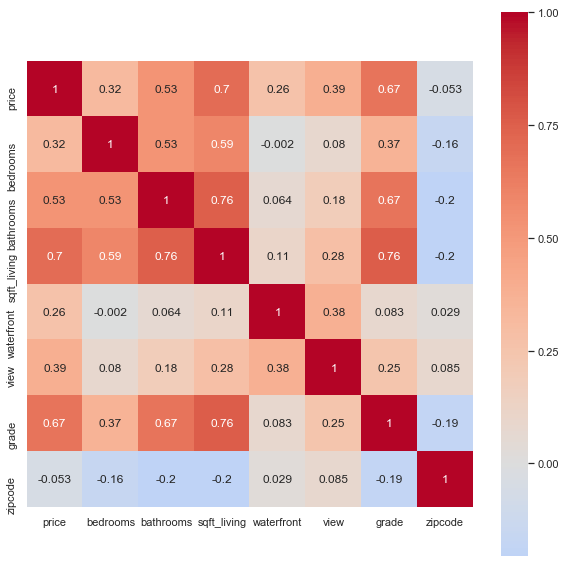

In [49]:
corr4 = df4.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data = corr4, center = 0, cmap="coolwarm", annot=True, square=True)

In [50]:
X2 = df3[['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'built',
       'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98155', 'zip_98166', 'zip_98177',
       'zip_98199',
       'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13']]

In [51]:
X2 = sms.add_constant(X2)
y2 = df3.price

model2 = sms.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1603.
Date:                Sat, 02 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:47:00   Log-Likelihood:            -2.8830e+05
No. Observations:               21595   AIC:                         5.767e+05
Df Residuals:                   21529   BIC:                         5.773e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.591e+04   5513.141      6.513      0.000    2.51e+04    4.67e+04
bedrooms    -1.532e+04   1543.042     -9.929      0.000   -1.83e+04   -1.23e+04
bathrooms     2.54e+04   2413.656     10.524      0.000    2.07e+04    3.01e+04
sqft_living   156.3904      2.460     63.561      0.000     151.568     161.213
waterfront    6.61e+05   1.38e+04     47.923      0.000    6.34e+05    6.88e+05
view         5.269e+04   1591.807     33.102      0.000    4.96e+04    5.58e+04
built       -9343.3229    515.483    -18.125      0.000   -1.04e+04   -8332.937
zip_98004    7.621e+05   9011.192     84.577      0.000    7.44e+05     7.8e+05
zip_98005    3.068e+05   1.21e+04     25.413      0.000    2.83e+05     3.3e+05
zip_98006    2.468e+05   7382.631     33.427      0.000    2.32e+05    2.61e+05
zip_98007    2.495e+05   1.31e+04     19.107      0.000    2.24e+05    2.75e+05
zip_98008    2.567e+05   9362.845     27.419      0.000    2.38e+05    2.75e+05
zip_98010    7.174e+04   1.54e+04      4.658      0.000    4.16e+04    1.02e+05
zip_98011    1.281e+05   1.12e+04     11.488      0.000    1.06e+05     1.5e+05
zip_98014    9.492e+04   1.39e+04      6.838      0.000    6.77e+04    1.22e+05
zip_98019    9.448e+04   1.13e+04      8.356      0.000    7.23e+04    1.17e+05
zip_98024    1.621e+05   1.72e+04      9.432      0.000    1.28e+05    1.96e+05
zip_98027    1.614e+05   7909.880     20.401      0.000    1.46e+05    1.77e+05
zip_98028    1.223e+05   9337.058     13.096      0.000    1.04e+05    1.41e+05
zip_98029    2.135e+05   8921.018     23.927      0.000    1.96e+05    2.31e+05
zip_98033     3.57e+05   7714.851     46.280      0.000    3.42e+05    3.72e+05
zip_98034    1.928e+05   6908.246     27.911      0.000    1.79e+05    2.06e+05
zip_98038     3.95e+04   6739.508      5.861      0.000    2.63e+04    5.27e+04
zip_98039    1.232e+06   2.19e+04     56.248      0.000    1.19e+06    1.28e+06
zip_98040    5.088e+05   9566.088     53.191      0.000     4.9e+05    5.28e+05
zip_98045    9.424e+04   1.05e+04      8.954      0.000    7.36e+04    1.15e+05
zip_98052    2.365e+05   6830.620     34.624      0.000    2.23e+05     2.5e+05
zip_98053    2.202e+05   8069.074     27.290      0.000    2.04e+05    2.36e+05
zip_98056    9.194e+04   7890.316     11.652      0.000    7.65e+04    1.07e+05
zip_98058    3.352e+04   7503.243      4.467      0.000    1.88e+04    4.82e+04
zip_98059    8.936e+04   7451.390     11.993      0.000    7.48e+04    1.04e+05
zip_98065    9.308e+04   9051.035     10.284      0.000    7.53e+04    1.11e+05
zip_98072    1.607e+05   9532.415     16.857      0.000    1.42e+05    1.79e+05
zip_98074    1.745e+05   7758.285     22.488      0.000    1.59e+05     1.9e+05
zip_98075    1.775e+05   8593.052     20.658      0.000    1.61e+05    1.94e+05
zip_98077    1.275e+05   1.12e+04     11.38

Model accuracy has been improved upto 83% by using dummies for catagoric variables and eliminating non significant and non relevant variables

### Log(Price)

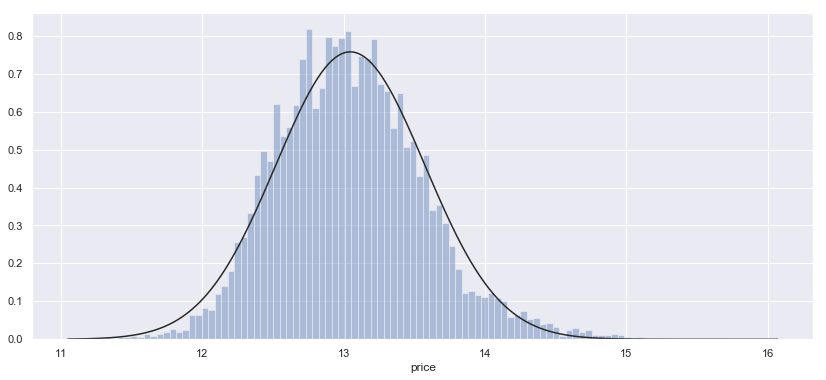

In [52]:
df3['price'] = np.log(df3['price'])
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df3.price, bins=100, kde=False, fit=norm)

In [53]:
X2 = sms.add_constant(X2)
y2 = df3.price

model2 = sms.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1984.
Date:                Sat, 02 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:47:00   Log-Likelihood:                 4207.1
No. Observations:               21595   AIC:                            -8282.
Df Residuals:                   21529   BIC:                            -7756.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0480      0.007   1667.527      0.000      12.034      12.062
bedrooms       -0.0037      0.002     -1.813      0.070      -0.008       0.000
bathrooms       0.0424      0.003     13.417      0.000       0.036       0.049
sqft_living     0.0002   3.22e-06     72.129      0.000       0.000       0.000
waterfront      0.4762      0.018     26.343      0.000       0.441       0.512
view            0.0701      0.002     33.585      0.000       0.066       0.074
built          -0.0113      0.001    -16.719      0.000      -0.013      -0.010
zip_98004       1.0702      0.012     90.621      0.000       1.047       1.093
zip_98005       0.7091      0.016     44.818      0.000       0.678       0.740
zip_98006       0.5998      0.010     61.991      0.000       0.581       0.619
zip_98007       0.6150      0.017     35.939      0.000       0.581       0.649
zip_98008       0.5989      0.012     48.811      0.000       0.575       0.623
zip_98010       0.2299      0.020     11.389      0.000       0.190       0.269
zip_98011       0.4041      0.015     27.644      0.000       0.375       0.433
zip_98014       0.2720      0.018     14.950      0.000       0.236       0.308
zip_98019       0.2978      0.015     20.099      0.000       0.269       0.327
zip_98024       0.4108      0.023     18.235      0.000       0.367       0.455
zip_98027       0.4678      0.010     45.133      0.000       0.448       0.488
zip_98028       0.3695      0.012     30.199      0.000       0.346       0.394
zip_98029       0.5391      0.012     46.110      0.000       0.516       0.562
zip_98033       0.7314      0.010     72.341      0.000       0.712       0.751
zip_98034       0.4926      0.009     54.413      0.000       0.475       0.510
zip_98038       0.1473      0.009     16.681      0.000       0.130       0.165
zip_98039       1.2257      0.029     42.686      0.000       1.169       1.282
zip_98040       0.8302      0.013     66.219      0.000       0.806       0.855
zip_98045       0.2943      0.014     21.334      0.000       0.267       0.321
zip_98052       0.5949      0.009     66.453      0.000       0.577       0.612
zip_98053       0.5694      0.011     53.849      0.000       0.549       0.590
zip_98056       0.2598      0.010     25.128      0.000       0.240       0.280
zip_98058       0.1232      0.010     12.530      0.000       0.104       0.142
zip_98059       0.3166      0.010     32.420      0.000       0.297       0.336
zip_98065       0.3558      0.012     29.999      0.000       0.333       0.379
zip_98072       0.4699      0.012     37.614      0.000       0.445       0.494
zip_98074       0.5129      0.010     50.447      0.000       0.493       0.533
zip_98075       0.5400      0.011     47.954      0.000       0.518       0.562
zip_98077       0.4631      0.015     31.54

Model accuracy has been improved upto 85% by using log(price) as dependent variable as the price is not normally distributed

### K-Folds Cross Validation

In [54]:
df_kf = df3.copy()
y = df_kf.price.values
df_kf.drop(['date', 'price'], axis = 1, inplace=True)
df_kf.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,season,basement,built,zip_98002,zip_98003,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0,3,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1,0,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0,0,1,6,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [55]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_kf, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17276, 103) (17276,)
(4319, 103) (4319,)


In [56]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

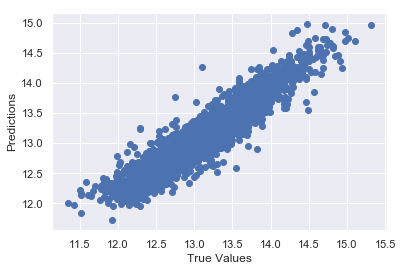

In [57]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [58]:
print('Score: ', model.score(X_test, y_test))

Score:  0.8796958330022062


## Future Work

In [61]:
# age of house in years since built or renovated
# slice data set (2014/2015, low/ medium/ high priced houses, ...)
# map zipcodes by median price within zipcode area
# scaling variable where needed (?)
# MSE as metric of accuracy

## Conclusion & Business Recommendations:
1. Zipcode: Location matters. Houses located in prestgious neigthbarhoods are higher priced.
2. Grade: The grade has a significant positive impact on the house price. A grade of 8 and above are desirable. The higher the grade the higher the price of the house.
3. Bathrooms: The more bathrooms your house has the higher the price. Build more bathrooms!